<a href="https://colab.research.google.com/github/LorenzoBussotti/California_house_median_value_prediction/blob/main/Californian_house_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California house ML prediction
#### by Lorenzo Bussotti

The aim of this project was to develop a procedure for a first data analysis, and then to the definition of multiple machine learning models for the prediction of median Californian-house value. In this regards, I am going to use 5 specific models such as linear regression, decision tree, random forest, K-nearest neighbors and support vector regressor, which finally will be compared among one another to find the best.

In [ ]:
#supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving housing.csv to housing.csv


In [ ]:
import io
ch = pd.read_csv(io.BytesIO(data_to_load['housing.csv']))
ch.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Dataset: 
- longitude <br>
- latitude <br>
- housing median age <br>
- total rooms number <br>
- total bedrooms number <br>
- population 
- households <br>
- median income <br>
- median house value --> target feature! <br>
- ocean proximity (the only categorical feature)

###### It's a regression problem!

In [ ]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
ch.isnull().sum() # total bedrooms has missing values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

##### Descripive statistics<br>

The table shows how only 'housing median age' and 'median income' has similar mean and median which can lead to think their distribution may be close to simmetrical normal-type: I'll verify it lately with distribution visualization. 

The assumption that mean == median signify normal distribution is just an hypothesis which needs to be verify subsequently, by visual analysis. In an hypothetical gaussian (normal) distribution median and mode are equal to mu (mean) (https://www.scribbr.com/statistics/central-tendency/, https://www.quora.com/Are-the-mean-median-and-mode-equal-in-a-normal-distribution).

In this case mean and median are not perfectly equal, which does not imply a normal distribution; however, their values are very similar, which would take close to it.

Nicely, we can see how big is the difference between the minimum median-house-value (14999) and its maximum (500001).

In [ ]:
ch.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##### Treat missing values

Since the number of missing values is about 1% on the total I will not eliminate the whole columns, which would be deleted whereas missing values >30%, due to huge amount of loss information. <br>
On the contrary, I am going to check the 'total bedroom' distribution in order to verify the possible skewness and subsequently, treat those missing values. <br>


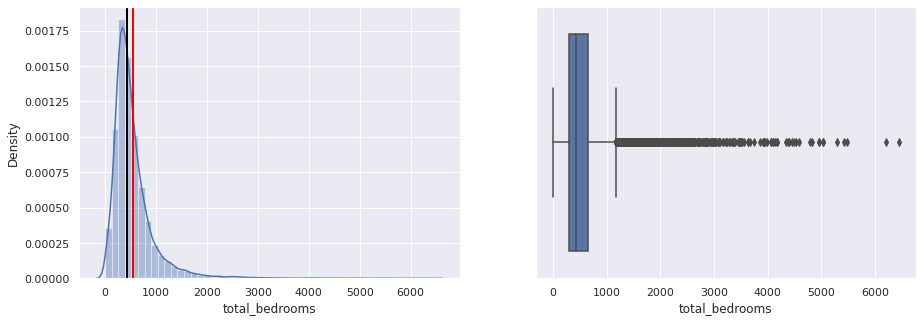

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
sns.distplot(ch.total_bedrooms, ax=axs[0])
sns.boxplot(ch.total_bedrooms, ax=axs[1])
axs[0].axvline(x=ch['total_bedrooms'].mean(), linewidth=2, color="red") #red line to show the mean
axs[0].axvline(x=ch['total_bedrooms'].median(), linewidth=2, color="black")#black line to show the median
plt.show()

Since the distribution is right skewed, I opted to replace the missing values with the median. 

In [ ]:
#fixing data null with median
ch['total_bedrooms'].fillna(value=ch['total_bedrooms'].median(), inplace=True)
ch.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

##### Distribution visualization

Let's perform a visual exploratory data analysis in order to discover the distribution of continuous features. <br>
'Median income' distribution is the one most similar to the target 'median house value' distribution. <br>
'Longitude' and 'latitude' has similar distribution (bimodal), as well as 'total rooms', 'total bedrooms' and 'households' which are all right skewed. <br> Anyway, latitude has the first local maximum is higher than the second, whilst in longitude is the contrary; this fact might be readed as a negative correlation between the two variables. <br>
Population is mostly distibuted in the range 3000-10000 people. <br>
Interestingly, the target feature 'median house value' has very high frequency of values close to the maximum. which is in contrast with the whole distribution.   <br>
Similar behaviuor is shown by 'housing median age' which appears to have highest density at the oldest age, whilst the rest of the data follow a multimodal distribution! <br>
May the highest value of houses be explained by the highest housing age?


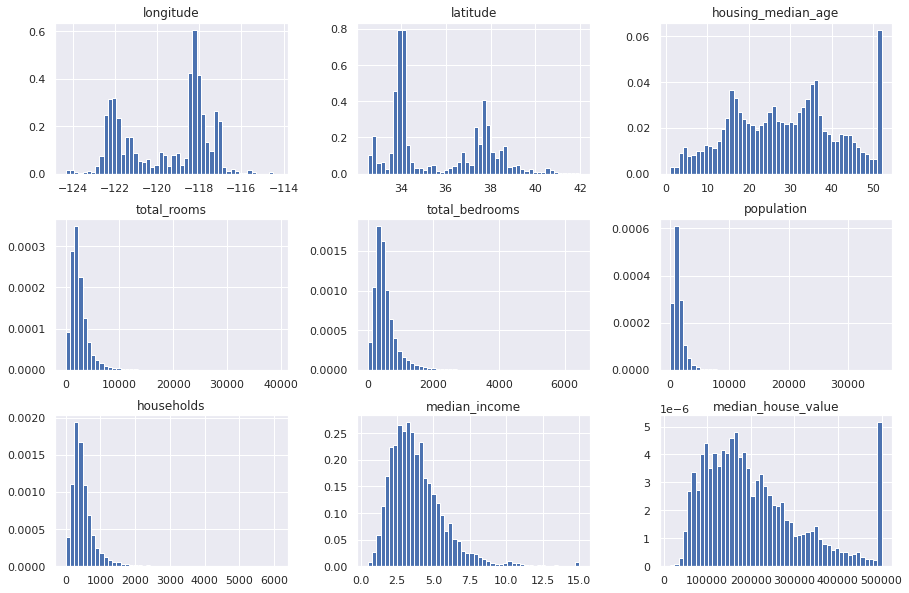

In [ ]:
ch.hist(bins=50, figsize=(15, 10), density=True)
plt.show()

##### Correlation matrix: continuous variable vs continuous variable

Now, let's evaluate the correlation among continuous features! <br>
The greater correlation with the variable target is showed by 'median income', previously indicated with similar distribution to the target. <br>
As mentioned before, longitude and latitude have high negative correlation

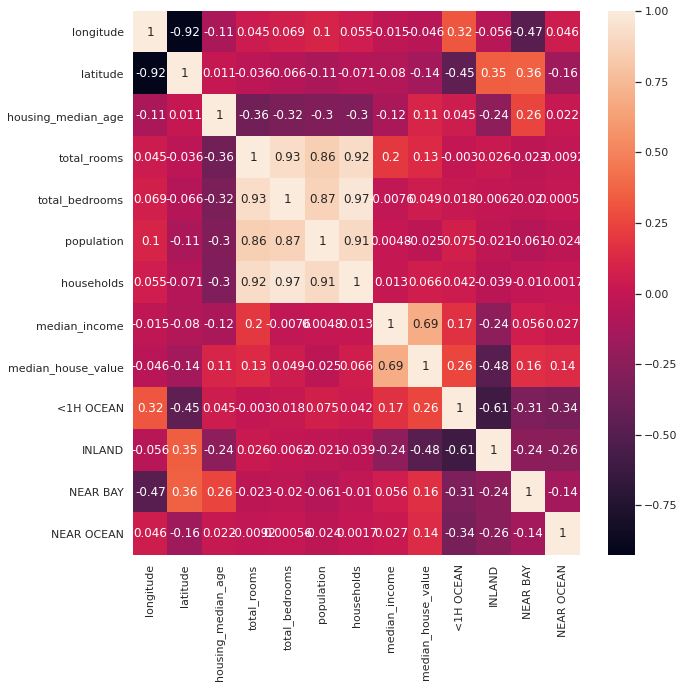

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(ch.corr(), annot=True)
plt.show()

From the figure below, it can be asserted that the highest-density age's bin don't influence the 'median house value'.

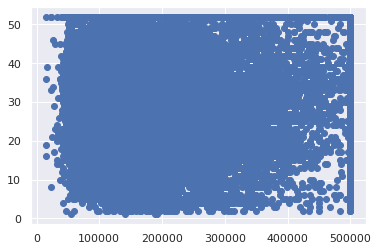

In [ ]:
plt.scatter(ch['median_house_value'], ch['housing_median_age'])
plt.show()

##### Checking the categorical variable

The code below shows that the houses near ocean (include "near ocean", "near bay" and "less than 1h ocean") are highly more than those INLAND in the range of values 490000-500001; hereby, it is possible that the highest house values may be associated with the 'ocean proximity' variable.

In [ ]:
ch[(ch.median_house_value.between(490000, 500001))].groupby(['ocean_proximity'])['median_house_value'].count()

ocean_proximity
<1H OCEAN     565
INLAND         28
NEAR BAY      209
NEAR OCEAN    230
Name: median_house_value, dtype: int64

Then, control the categorical feature 'ocean proximity' to understand the frequency for each category!




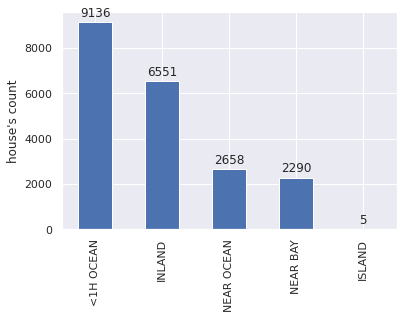

In [ ]:
plot = ch['ocean_proximity'].value_counts().plot(kind='bar', ylabel="house's count") #count values of 'ocean_proximity'
for p in plot.patches:
    plot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

Since that one-hour proximity houses are those with highest frequency, let's show whether the highest median-value houses are situated near the ocean.  <br>
Down below, I plotted the house examples using the coordinates and hence, the graph can be interpreted as geographical-kind (different size of spots indicates the related population). The figure shows how the median value roughly increase in the proximity of Pacific Ocean.


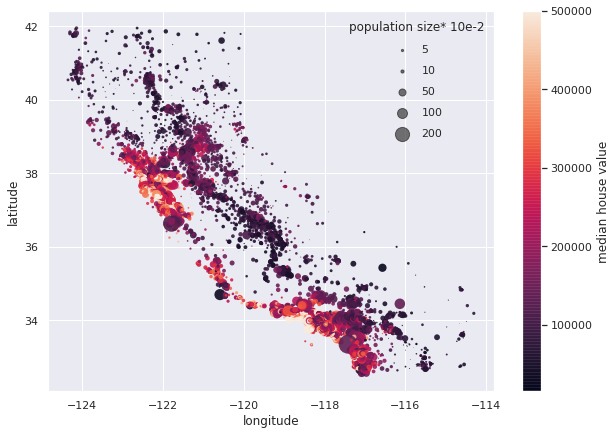

In [ ]:
lat, lon = ch['latitude'], ch['longitude']
mhv = ch['median_house_value']
# Scatter the points, using size and color but no label
plt.figure(figsize=(10,7))
plt.scatter(
    lon, lat, 
    c=mhv, 
    s=ch['population']/100, 
    linewidth=0, alpha=0.9,
)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='median house value')

for pop in [5, 10, 50, 100, 200]:
    plt.scatter([], [],  alpha=0.6, s=pop,
                label=str(pop), c='k')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, title='population size* 10e-2')
plt.show()

##### Boxplot: categorical variable vs continuous variable

We have already seen that 'ocena proximity' may influence the target! <br>
Let's now visualize it with a boxplot: <br>
if the distribution is different for each category, it suggests that these variables might be correlated with median house value.<br>

In this case, the categorical predictor looks correlated with the target variable.

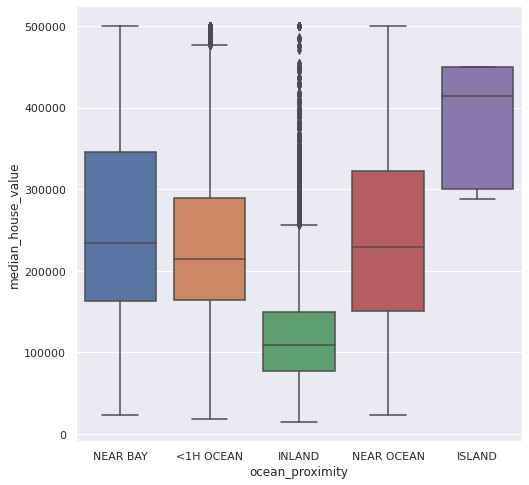

In [ ]:
# Box plots for the Target Variable "median_house_value" and categorical predictor "ocean_proximity"
plt.figure(figsize=(8,8))
sns.boxplot('ocean_proximity','median_house_value', data=ch)
plt.show()

In order to use categorical object transform the letters in numbers become necessary, since machines understand only the former. Thus, I am going to use one-hot encoding where every unique value in the category will be added as a feature.

In [ ]:
ch_ocean = pd.get_dummies(ch.ocean_proximity) #pandas one-hot encoding
ch[ch_ocean.columns] = ch_ocean #join new columns to original dataset
ch = ch.drop(columns=['ocean_proximity', 'ISLAND'], axis=1) #drop'island' due to its numerical inconsistency
ch.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


###### Sklearn modules import and data (categorical) preprocessing

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from time import time

##### Splitting data 

In [ ]:
#separating data
X = ch.drop('median_house_value', axis=1)
y = ch.median_house_value

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

First, train models that don't need data to scale. <br>

Note: I'll be using randomized search for cross validation due to its quickness and similarity in results, in the comparison with gridsearchCV

##### Define a function to train models (RF, DT, KNN and SVR)


In [ ]:
def model(models,params):
    r_2 = [] 
    mae_ = []
    rs= RandomizedSearchCV(models,params, cv=5, n_jobs=-1)
    start = time()
    rs.fit(X_train,y_train)
    #prediction on test data
    y_pred =rs.predict(X_test)
    #R2
    r2= r2_score(y_test, y_pred).round(decimals=2)
    print('R2 on test set: %.2f' %r2)
    r_2.append(r2)
    #RMSE
    mae = mean_absolute_error(y_test, y_pred).round(decimals=2)
    print('Mean absolute Error: %.2f' %mae)
    mae_.append(mae)
    #print running time
    print('RandomizedSearchCV took: %.2f' %(time() - start),'seconds')
    return r_2, mae_ 

##### Linear Regression  

In [ ]:
params = {
    'fit_intercept': [True, False],      
}

LR = model(LinearRegression(), params)

R2 on test set: 0.64
Root mean squared Error: 50078.10
RandomizedSearchCV took: 0.14 seconds


##### Decision Tree

In [ ]:
#defining parameters for decision tree regressor
params= {

    'min_samples_split':np.arange(2, 20),
    'min_samples_leaf':np.arange(2, 10)
}

DT = model(DecisionTreeRegressor(), params)

R2 on test set: 0.74
Root mean squared Error: 39054.36
RandomizedSearchCV took: 4.31 seconds


##### Random Forest

In [ ]:
#define dictionary with model's hyperparameters
params = {
    'n_estimators':[50,100,500], 
    'max_depth': [None],
    'min_samples_leaf': np.arange(2,12),
    'max_features': [None], #Empirical good default values are None (considering all features instead of a random subset)
    'bootstrap':[True]
}

RF = model(RandomForestRegressor(), params)

R2 on test set: 0.82
Root mean squared Error: 31500.08
RandomizedSearchCV took: 507.23 seconds


##### Data scaling

In [ ]:
#since our distribution aren't mainly gaussian, I opted for standardization instead of normalization
#scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

##### KNN

In [ ]:
#define dictionary with model's hyperparameters
params = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 19, 21],
    'weights': ['uniform', 'distance']
}

KNN = model(KNeighborsRegressor(), params)

R2 on test set: 0.73
Root mean squared Error: 40323.83
RandomizedSearchCV took: 7.45 seconds


##### SVR

In [ ]:
params = {
    'kernel' :['rbf', 'linear'],
    'epsilon': [0.1],
    'C': [0.01, 0.1, 1, 10, 100, 1000],
     'gamma': np.logspace(-2, 2, 5)  
}

SVR = model(SVR(), params)

R2 on test set: 0.61
Root mean squared Error: 49289.54
RandomizedSearchCV took: 299.51 seconds


##### Comparison among models

Lastly, let's built a table to compare the models to find that fit data the best! <br>
In this case, the best model appears to be the ensamble Random Forest regressor.

In [ ]:
data = [LR[0], LR[1], DT[0], DT[1] , RF[0], RF[1],  KNN[0], KNN[1], SVR[0], SVR[1]]
final_data = [item for sublist in data for item in sublist]
index = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'KNN Regression','SVR Regressor']
df = pd.DataFrame(index=index)
df['R2 score'] =[i for i in final_data if i < 1]
df['MAE'] = [i for i in final_data if i > 1]
df.sort_values(by='R2 score', ascending=False)

,R2 score,MAE
Random Forest Regressor,0.82,31500.08
Decision Tree Regressor,0.74,39054.36
KNN Regression,0.73,40323.83
Linear Regression,0.64,50078.10
SVR Regressor,0.61,49289.54
